In [83]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [84]:
df = pd.read_csv('data_science_job.csv')

In [85]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [86]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


<Figure size 1200x800 with 0 Axes>

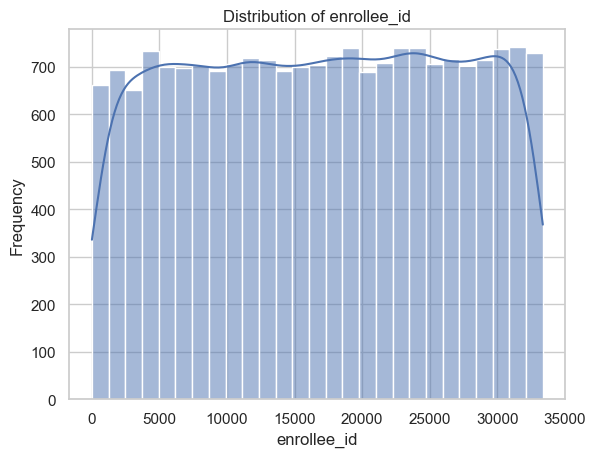

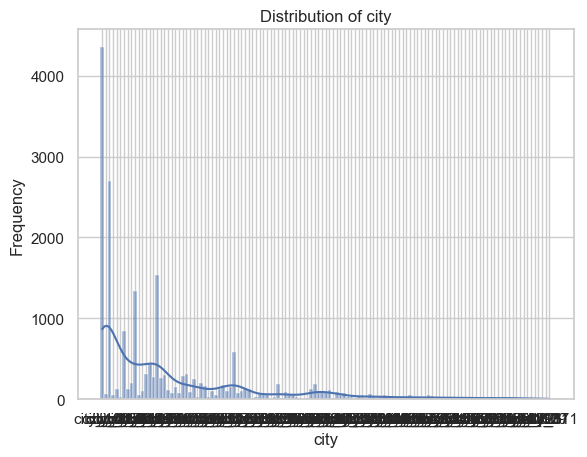

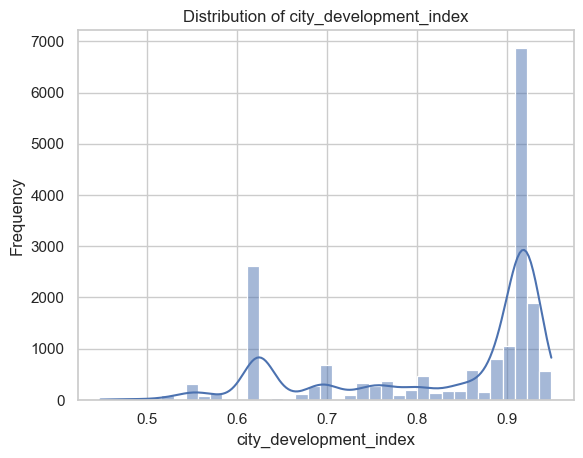

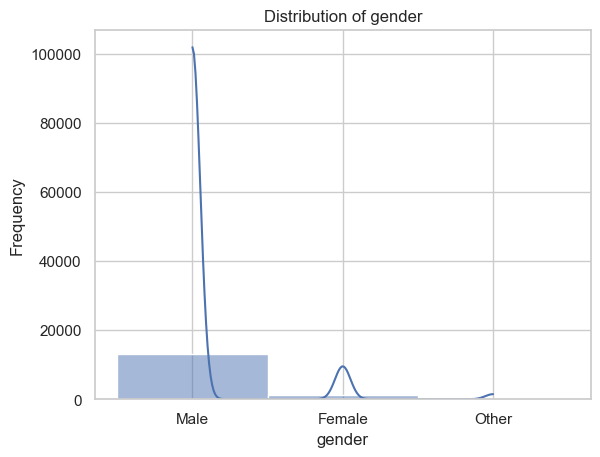

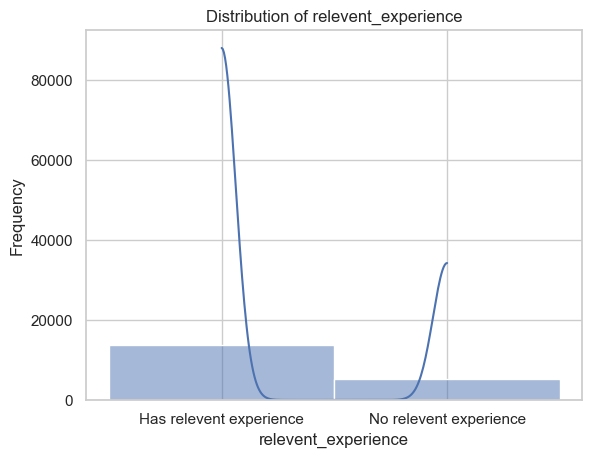

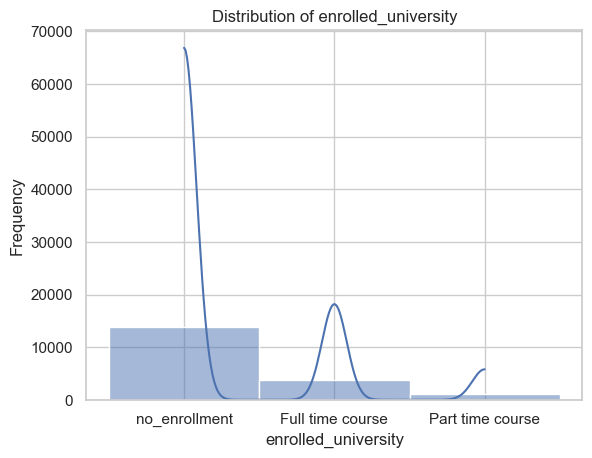

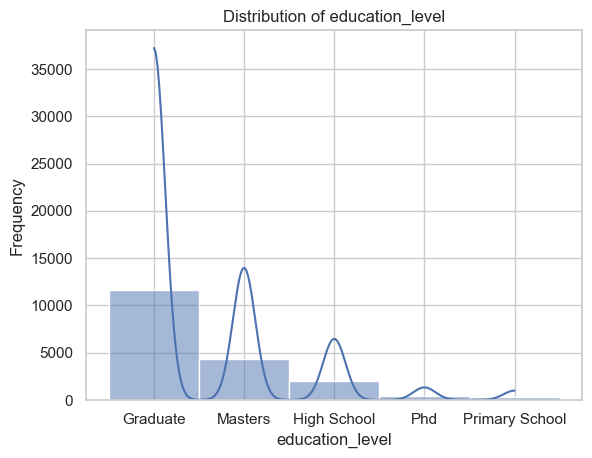

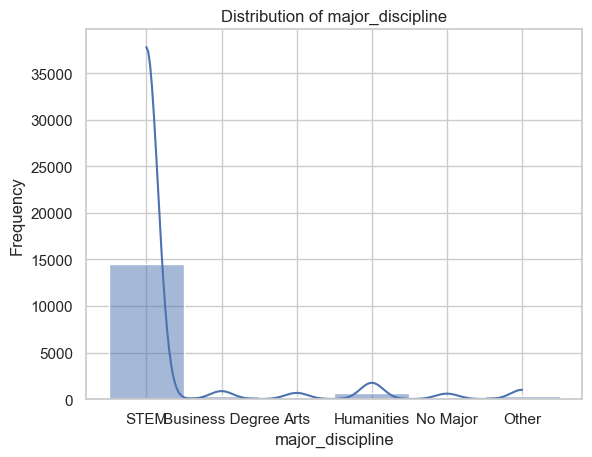

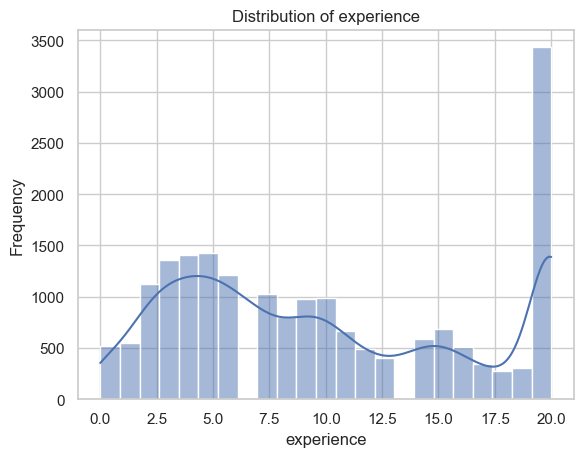

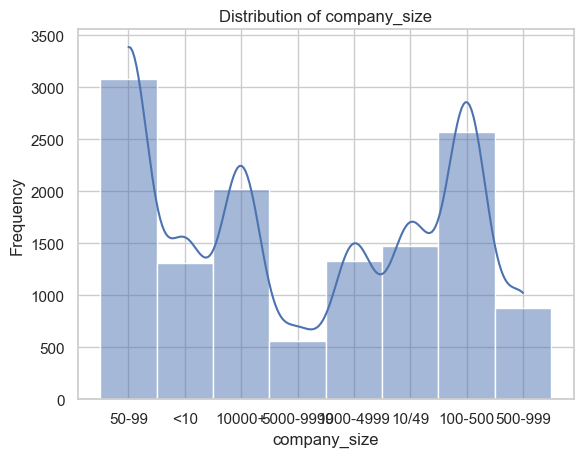

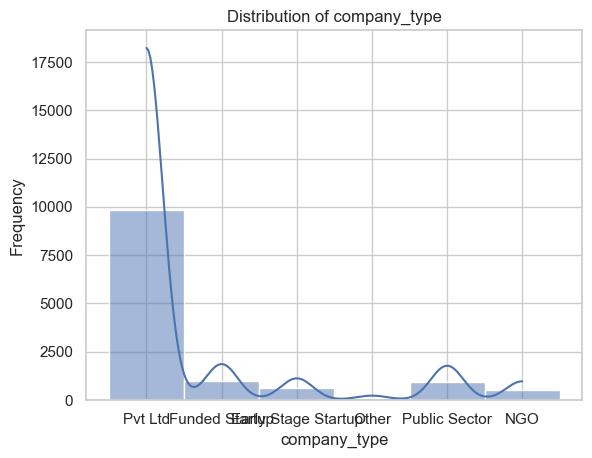

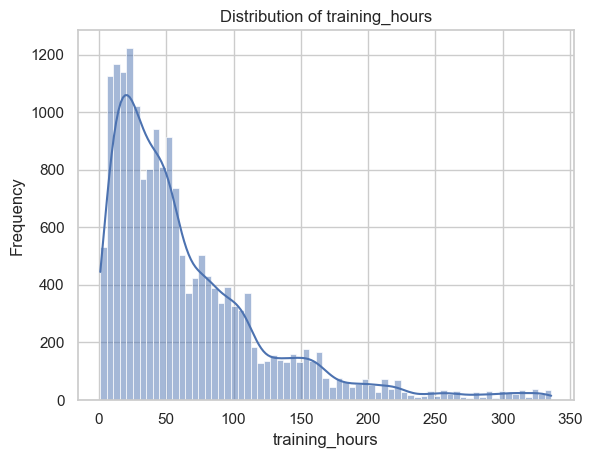

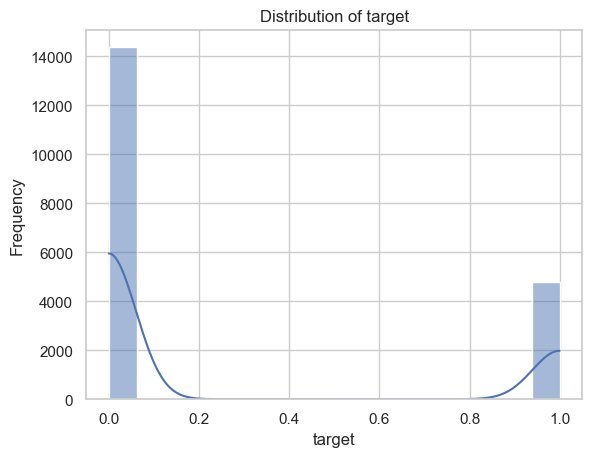

In [87]:
# Plotting the distribution of each attribute
plt.figure(figsize=(12, 8))  # Set the figure size
for column in df.columns:
    plt.figure()
    sns.histplot(data=df, x=column, kde=True)  # Create a histogram plot with KDE
    plt.title(f'Distribution of {column}')  # Set the title
    plt.xlabel(column)  # Set the x-axis label
    plt.ylabel('Frequency')  # Set the y-axis label
    plt.show()  # Display the plot


In [88]:
df.isnull().mean() * 10

enrollee_id               0.000000
city                      0.000000
city_development_index    0.250026
gender                    2.353064
relevent_experience       0.000000
enrolled_university       0.201482
education_level           0.240109
major_discipline          1.468316
experience                0.033928
company_size              3.099488
company_type              3.204927
training_hours            0.399833
target                    0.000000
dtype: float64

In [89]:
le = LabelEncoder()
df['city'] = le.fit_transform(df['city'])
df['gender'] = le.fit_transform(df['gender'])
df['relevent_experience'] = le.fit_transform(df['relevent_experience'])
df['enrolled_university'] = le.fit_transform(df['enrolled_university'])
df['education_level'] = le.fit_transform(df['education_level'])
df['major_discipline'] = le.fit_transform(df['major_discipline'])
df['company_size'] = le.fit_transform(df['company_size'])
df['company_type'] = le.fit_transform(df['company_type'])   
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,5,0.920,1,0,2,0,5,20.0,8,6,36.0,1.0
1,29725,77,0.776,1,1,2,0,5,15.0,4,5,47.0,0.0
2,11561,64,0.624,3,1,0,0,5,5.0,8,6,83.0,0.0
3,33241,14,0.789,3,1,3,0,1,0.0,8,5,52.0,1.0
4,666,50,0.767,1,0,2,2,5,20.0,4,1,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,55,0.878,1,1,2,0,2,14.0,8,6,42.0,1.0
19154,31398,5,0.920,1,0,2,0,5,14.0,8,6,52.0,1.0
19155,24576,5,0.920,1,0,2,0,5,20.0,4,5,44.0,0.0
19156,5756,94,0.802,1,0,2,1,6,0.0,5,5,97.0,0.0


In [90]:
df = df.drop(columns=['enrollee_id'])

In [91]:
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors
X_imputed = imputer.fit_transform(X)

# Convert the imputed data back to a DataFrame with column names
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Split the imputed data into training and testing sets
X_train_imputed, X_test_imputed, y_train, y_test = train_test_split(X_imputed_df, y, test_size=0.2, random_state=2)

In [92]:
X_train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours
7869,64,0.624,1,0,2,0,5,2.0,7,0,134.0
2884,5,0.920,3,0,2,0,3,8.0,8,6,58.0
7207,5,0.920,1,1,0,1,6,7.0,8,6,206.0
3807,64,0.624,1,0,0,0,5,0.0,8,6,28.0
1861,64,0.624,3,0,2,0,5,7.0,4,5,35.0


/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

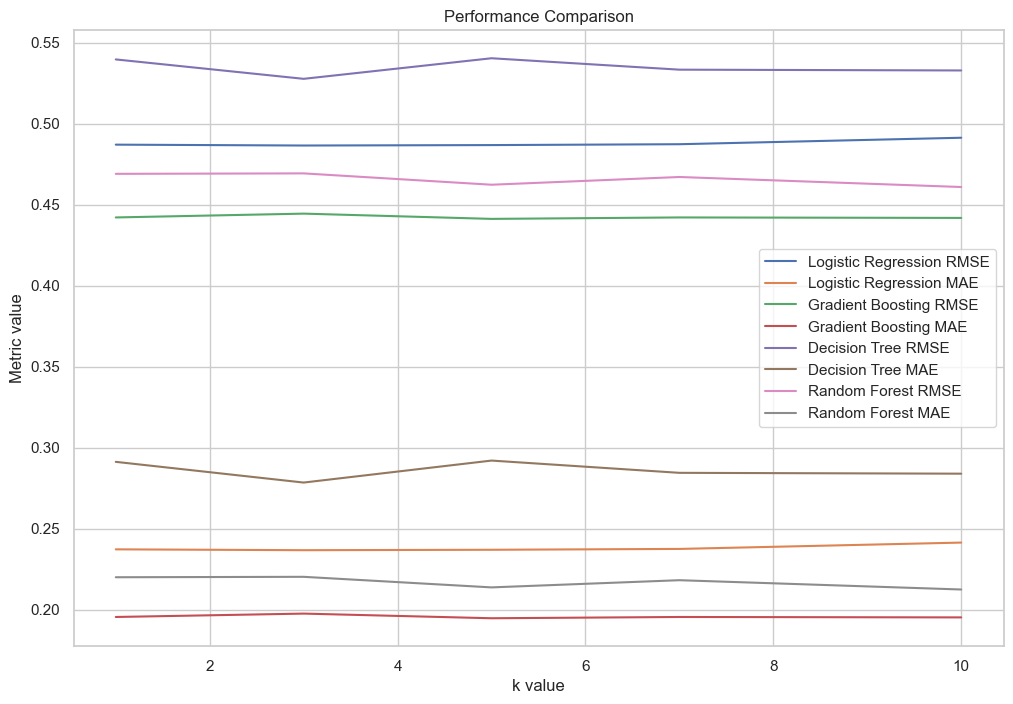

In [94]:
k_values = [1, 3, 5, 7, 10]  # Different k values for KNN imputer

# Initialize the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

results = []  # To store results for each k value and classifier

for k in k_values:
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X)
    X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

    X_train_imputed, X_test_imputed, y_train, y_test = train_test_split(X_imputed_df, y, test_size=0.2, random_state=2)

    k_results = {'k': k}

    for clf_name, clf in classifiers.items():
        clf.fit(X_train_imputed, y_train)
        y_pred = clf.predict(X_test_imputed)

        accuracy = accuracy_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)

        k_results[f'{clf_name}_accuracy'] = accuracy
        k_results[f'{clf_name}_rmse'] = rmse
        k_results[f'{clf_name}_mae'] = mae

    results.append(k_results)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Plotting RMSE and MAE for each k value and classifier
plt.figure(figsize=(12, 8))
for clf_name in classifiers.keys():
    plt.plot(results_df['k'], results_df[f'{clf_name}_rmse'], label=f'{clf_name} RMSE')
    plt.plot(results_df['k'], results_df[f'{clf_name}_mae'], label=f'{clf_name} MAE')

plt.xlabel('k value')
plt.ylabel('Metric value')
plt.title('Performance Comparison')
plt.legend()
plt.show()